In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('nyc_building_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   NEIGHBORHOOD               84548 non-null  object
 1   BUILDING CLASS CATEGORY    84548 non-null  object
 2   ADDRESS                    84548 non-null  object
 3   ZIP CODE                   84548 non-null  int64 
 4   TOTAL UNITS                84548 non-null  int64 
 5   LAND SQUARE FEET           84548 non-null  object
 6   GROSS SQUARE FEET          84548 non-null  object
 7   YEAR BUILT                 84548 non-null  int64 
 8   TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 9   SALE PRICE                 84548 non-null  int64 
 10  BOROUGH NAME               84548 non-null  object
 11  DATE                       84548 non-null  object
 12  MONTH                      84548 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 8.4+ MB


In [52]:
df.describe()

,ZIP CODE,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,MONTH
count,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04,84548.000000
mean,10731.991614,2.249184,1789.322976,1.657485,1.056623e+06,6.564188
std,1290.879147,18.972584,537.344993,0.819341,1.038794e+07,3.467219
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000
25%,10305.000000,1.000000,1920.000000,1.000000,0.000000e+00,4.000000
50%,11209.000000,1.000000,1940.000000,2.000000,4.150000e+05,6.000000
75%,11357.000000,2.000000,1965.000000,2.000000,8.300000e+05,10.000000
max,11694.000000,2261.000000,2017.000000,4.000000,2.210000e+09,12.000000


Manhattan house count 

In [35]:
#df.groupby('BOROUGH NAME').count()
df['BOROUGH NAME'].value_counts()

Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: BOROUGH NAME, dtype: int64

In [51]:
avg_price=df.groupby('BOROUGH NAME').agg({'SALE PRICE':['mean']})
round(avg_price)
#avg_price
#avg_price=df['SALE PRICE'].mean()
#avg_pric

,SALE PRICE
,mean
BOROUGH NAME,
Bronx,590194.0
Brooklyn,834488.0
Manhattan,2632835.0
Queens,510348.0
Staten Island,388444.0


In [39]:
#lst=[]
#lst=df.groupby(['BOROUGH NAME','NEIGHBORHOOD']).agg({'SALE PRICE':['max']})
#lst

In [40]:
df.groupby('BOROUGH NAME').max()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ADDRESS,ZIP CODE,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,DATE,MONTH
BOROUGH NAME,,,,,,,,,,,,
Bronx,WOODLAWN,47 CONDO NON-BUSINESS STORAGE,ZEREGA AVENUE,10803,955,999,997,2017,4,110000000,2017-08-31,12
Brooklyn,WYCKOFF HEIGHTS,49 CONDO WAREHOUSES/FACTORY/INDUS,WORTMAN AVENUE,11249,889,9980,9972,2017,4,345000000,2017-08-31,12
Manhattan,WASHINGTON HEIGHTS UPPER,49 CONDO WAREHOUSES/FACTORY/INDUS,WEST 52ND STREET,10463,1653,9992,9992,2017,4,2210000000,2017-08-31,12
Queens,WOODSIDE,48 CONDO TERRACES/GARDENS/CABANAS,WALTHAM STREET,11694,2261,9975,999,2017,4,257500000,2017-08-31,12
Staten Island,WOODROW,46 CONDO STORE BUILDINGS,YORK AVENUE,10314,143,9996,997,2016,4,122000000,2017-08-31,12


In [58]:
df.groupby('MONTH').agg({'SALE PRICE':['sum']})

,SALE PRICE
,sum
MONTH,
1,7875755274
2,5490634761
3,7479972961
4,6004317857
5,9870462634
6,8385461157
7,6554480404
8,6037002558


<AxesSubplot:xlabel='MONTH'>

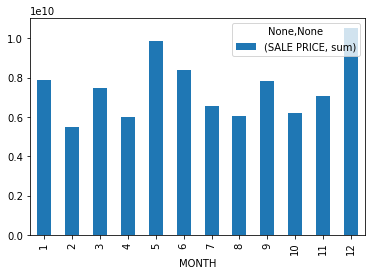

In [61]:
df.groupby('MONTH').agg({'SALE PRICE':['sum']}).plot.bar()

How many apartments were sold from parents to children (any ideas on how to find these transactions?)? Which month of the year and in which borough were sold the most?

In [64]:
df['SALE PRICE'].value_counts()
#df['SALE PRICE'].value_counts()[0]

0          24789
10           766
450000       427
550000       416
650000       414
           ...  
191100         1
1542499        1
782990         1
2784765        1
69300          1
Name: SALE PRICE, Length: 10007, dtype: int64